In [1]:
import os
import csv 
import numpy as np
import pandas as pd
import random
import math
import ast
import re
import regex
import string
from functools import reduce
import operator  
import warnings

from collections import OrderedDict
from collections import defaultdict
from datetime import datetime
from datetime import date
from ast import literal_eval

import urllib
import requests
import json
import shutil
import time
import fnmatch
from pathlib import Path

from requests_html import AsyncHTMLSession
from urllib.parse import urlparse
from requests_html import HTMLSession

#import PyPaperBot
import nltk
#import fitz
from nltk.corpus import stopwords


#from scidownl import scihub_download
import pickle
from text_preprocessing import preprocess_text
from text_preprocessing import *
from sentence_transformers import SentenceTransformer
from sentence_transformers import models
from sentence_transformers import util

import torch
from transformers import AutoTokenizer, AutoModel

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

from scipy import stats
from scipy.stats import ttest_1samp
import matplotlib.gridspec as gridspec
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

from scipy.stats import shapiro
from scipy.stats import normaltest

import pylab 

#from requests_html import HTMLSession

# import nest_asyncio
# nest_asyncio.apply()

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# %matplotlib notebook


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/psych256lab/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
seed=np.random.seed(42)
rng = np.random.RandomState(42)

In [3]:
mean_model_sim_score_columns = ['mean_tfidf_sim', 
       'mean_bert_large_uncased_sim', 'mean_all_distilroberta_v1_sim',
       'mean_all_mpnet_base_v2_sim', 'mean_all_MiniLM_L6_v2_sim',
       'mean_sentence_t5_xl_sim', 'mean_political_bert_sim',
       'mean_legal_bert_sim', 'mean_specter_sim', 'mean_scibert_sim',
       'mean_clinical_bert_sim', 'mean_biobert_base_cased_v12_sim']
columns = ['url', 'USApolicyCitation']+mean_model_sim_score_columns
len(columns)

14

In [5]:
# fultext-fulltext
fulltext_to_fulltext_file = pd.read_csv("/home/psych256lab/Documents/Mokarrama/Thesis/Final files/new/finalFile_with_meanSimScores.csv", usecols =columns, encoding ='utf-8')


In [6]:
# abstract_to_fulltext_file.info()
fulltext_to_fulltext_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2301 entries, 0 to 2300
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   url                              2301 non-null   object 
 1   USApolicyCitation                2301 non-null   int64  
 2   mean_tfidf_sim                   2280 non-null   float64
 3   mean_bert_large_uncased_sim      2280 non-null   float64
 4   mean_all_distilroberta_v1_sim    2280 non-null   float64
 5   mean_all_mpnet_base_v2_sim       2280 non-null   float64
 6   mean_all_MiniLM_L6_v2_sim        2280 non-null   float64
 7   mean_sentence_t5_xl_sim          2280 non-null   float64
 8   mean_political_bert_sim          2280 non-null   float64
 9   mean_specter_sim                 2280 non-null   float64
 10  mean_clinical_bert_sim           2280 non-null   float64
 11  mean_legal_bert_sim              2280 non-null   float64
 12  mean_scibert_sim    

In [7]:
lexical_counting_features = ['char_count', 'letter_count', 'word_count', 'syllable_count',
       'monosyllabcount', 'polysyllabcount', 'sentence_count',
       'avg_word_length', 'average_sentence_length', 'avg_syllables_per_word',
       'n_unique_words', 'n_long_words', 'n_difficult_words',
       'avg_n_unique_words', 'avg_n_long_words', 'avg_n_difficult_words',
       'avg_noun_count', 'avg_verb_count', 'avg_adverb_count',
       'avg_adjective_count', 'avg_conjunction_count','avg_adposition_count',
       'imp_pos_ratio', 'frequency_index', 'pos_dissimilarity'
        ] # 'syntactic_similarity','words_before_root'
lexical_diversity_features =['lex_ttr', 'lex_rttr',
       'lex_cttr', 'lex_maas', 'lex_msttr', 'lex_mattr', 'lex_hdd', 'lex_mtld',
       'lex_vocd', 'lex_herdan', 'lex_summer', 'lex_dugast', 'lex_yulek',
       'lex_yulei', 'lex_herdanvm', 'lex_simpsond']
readability_features =['reading_time',
       'smog_index', 'flesch_reading_ease', 'flesch_kincaid_grade',
       'automated_readability_index', 'gunning_fog', 'coleman_liau_index',
       'dale_chall_readability_score', 'linsear_write_formula',
       'mcalpine_eflaw' ]

textual_features_file_columns = ['url'] + lexical_counting_features+lexical_diversity_features+readability_features
len(textual_features_file_columns)

52

In [454]:
# textual_features_file_columns =['url','char_count',
#        'letter_count', 'word_count', 'syllable_count', 'monosyllabcount',
#        'polysyllabcount', 'sentence_count', 'avg_word_length',
#        'average_sentence_length', 'avg_syllables_per_word', 'n_unique_words',
#        'n_long_words', 'n_difficult_words', 'avg_n_unique_words',
#        'avg_n_long_words', 'avg_n_difficult_words', 'avg_noun_count',
#        'avg_verb_count', 'avg_adverb_count', 'avg_adjective_count',
#        'avg_conjunction_count', 'avg_adposition_count', 'imp_pos_ratio',
#        'frequency_index', 'pos_dissimilarity', 'syntactic_similarity',
#        'words_before_root', 'lex_ttr', 'lex_rttr', 'lex_cttr', 'lex_maas',
#        'lex_msttr', 'lex_mattr', 'lex_hdd', 'lex_mtld', 'lex_vocd',
#        'lex_herdan', 'lex_summer', 'lex_dugast', 'lex_yulek', 'lex_yulei',
#        'lex_herdanvm', 'lex_simpsond', 'reading_time', 'smog_index',
#        'flesch_reading_ease', 'flesch_kincaid_grade',
#        'automated_readability_index', 'gunning_fog', 'coleman_liau_index',
#        'dale_chall_readability_score', 'linsear_write_formula',
#        'mcalpine_eflaw']

In [8]:
textual_features_file = pd.read_csv('/home/psych256lab/Documents/Mokarrama/Thesis/merged_file2.csv', usecols =textual_features_file_columns , encoding = 'utf-8')


In [9]:
textual_features_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   url                           1633 non-null   object 
 1   char_count                    1633 non-null   float64
 2   letter_count                  1633 non-null   float64
 3   word_count                    1633 non-null   float64
 4   syllable_count                1633 non-null   float64
 5   monosyllabcount               1633 non-null   float64
 6   polysyllabcount               1633 non-null   float64
 7   sentence_count                1633 non-null   float64
 8   avg_word_length               1633 non-null   float64
 9   average_sentence_length       1633 non-null   float64
 10  avg_syllables_per_word        1633 non-null   float64
 11  n_unique_words                1633 non-null   float64
 12  n_long_words                  1633 non-null   float64
 13  n_d

In [10]:
textual_features_file.set_index('url', inplace = True)
# abstract_to_fulltext_file.set_index('url', inplace = True)
fulltext_to_text_file.set_index('url', inplace = True)

In [11]:
# merged_file = textual_features_file.join(abstract_to_fulltext_file, how='inner')
merged_file = textual_features_file.join(fulltext_to_text_file, how='inner')

In [12]:
merged_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1633 entries, https://doi.org/10.1001/archderm.138.12.1584 to https://doi.org/10.9778/cmajo.20190026
Data columns (total 64 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   char_count                       1633 non-null   float64
 1   letter_count                     1633 non-null   float64
 2   word_count                       1633 non-null   float64
 3   syllable_count                   1633 non-null   float64
 4   monosyllabcount                  1633 non-null   float64
 5   polysyllabcount                  1633 non-null   float64
 6   sentence_count                   1633 non-null   float64
 7   avg_word_length                  1633 non-null   float64
 8   average_sentence_length          1633 non-null   float64
 9   avg_syllables_per_word           1633 non-null   float64
 10  n_unique_words                   1633 non-null   float64
 11  n_long_wor

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from scipy.stats import spearmanr

In [14]:
features_with_minmax_scaling = ['avg_syllables_per_word','n_long_words','lex_mtld','lex_rttr','lex_cttr','automated_readability_index','lex_yulek','flesch_reading_ease', 'mcalpine_eflaw',
                                'flesch_kincaid_grade','polysyllabcount','word_count','syllable_count','sentence_count','char_count','avg_word_length','average_sentence_length',
                                'lex_yulei','reading_time','n_difficult_words','lex_vocd','n_unique_words','lex_dugast','smog_index','gunning_fog','linsear_write_formula',
                                'letter_count','monosyllabcount','coleman_liau_index','dale_chall_readability_score']
len(features_with_minmax_scaling)

30

In [15]:
scaler = MinMaxScaler()

In [16]:
scaled_merged_file = merged_file.copy(deep = False) 

In [17]:
scaled_merged_file.describe()

,char_count,letter_count,word_count,syllable_count,monosyllabcount,polysyllabcount,sentence_count,avg_word_length,average_sentence_length,avg_syllables_per_word,...,mean_all_distilroberta_v1_sim,mean_all_mpnet_base_v2_sim,mean_all_MiniLM_L6_v2_sim,mean_sentence_t5_xl_sim,mean_political_bert_sim,mean_specter_sim,mean_clinical_bert_sim,mean_legal_bert_sim,mean_scibert_sim,mean_biobert_base_cased_v12_sim
count,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.00000,1633.000000,1633.000000,1633.000000,...,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000
mean,37341.608083,36861.632578,7142.635028,12095.002449,4276.475199,1405.143295,479.97428,5.110147,14.907348,1.679853,...,0.170893,0.177325,0.145559,0.643186,0.594029,0.680475,0.788036,0.709814,0.611590,0.787762
std,53900.000939,53262.521311,10201.759159,17421.494431,5985.492774,2026.693356,650.42621,0.209874,2.075465,0.080771,...,0.025561,0.028907,0.024495,0.009358,0.027990,0.025803,0.017545,0.029169,0.022424,0.020587
min,2571.000000,2554.000000,503.000000,830.000000,274.000000,86.000000,17.00000,4.260000,9.200000,1.400000,...,0.080000,0.063000,0.058000,0.598000,0.460000,0.587000,0.701000,0.581000,0.551000,0.701000
25%,16442.000000,16227.000000,3233.000000,5331.000000,1984.000000,610.000000,222.00000,4.970000,13.500000,1.600000,...,0.156000,0.161000,0.131000,0.637000,0.576000,0.665000,0.776000,0.690000,0.595000,0.773000
50%,22719.000000,22435.000000,4414.000000,7389.000000,2698.000000,868.000000,296.00000,5.100000,14.700000,1.700000,...,0.173000,0.178000,0.146000,0.644000,0.593000,0.683000,0.787000,0.708000,0.609000,0.786000
75%,34305.000000,33925.000000,6624.000000,11119.000000,4090.000000,1293.000000,442.00000,5.250000,16.000000,1.700000,...,0.186000,0.194000,0.160000,0.649000,0.611000,0.699000,0.800000,0.730000,0.626000,0.801000
max,714580.000000,707544.000000,133726.000000,235014.000000,78518.000000,29277.000000,7989.00000,6.190000,29.600000,2.000000,...,0.288000,0.302000,0.248000,0.682000,0.708000,0.760000,0.844000,0.812000,0.693000,0.858000


In [18]:
scaled_merged_file[features_with_minmax_scaling] = scaler.fit_transform(scaled_merged_file[features_with_minmax_scaling])

In [19]:
scaled_merged_file.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1633 entries, https://doi.org/10.1001/archderm.138.12.1584 to https://doi.org/10.9778/cmajo.20190026
Data columns (total 64 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   char_count                       1633 non-null   float64
 1   letter_count                     1633 non-null   float64
 2   word_count                       1633 non-null   float64
 3   syllable_count                   1633 non-null   float64
 4   monosyllabcount                  1633 non-null   float64
 5   polysyllabcount                  1633 non-null   float64
 6   sentence_count                   1633 non-null   float64
 7   avg_word_length                  1633 non-null   float64
 8   average_sentence_length          1633 non-null   float64
 9   avg_syllables_per_word           1633 non-null   float64
 10  n_unique_words                   1633 non-null   float64
 11  n_long_wor

In [20]:
# scaled_merged_file[scaled_merged_file.columns[55:65]].describe()
scaled_merged_file.dropna(axis=0, inplace = True)

In [21]:
scaled_merged_file['avg_word_length'].value_counts()

0.419689    47
0.393782    41
0.424870    39
0.373057    35
0.398964    35
            ..
0.720207     1
0.150259     1
0.160622     1
0.170984     1
0.165803     1
Name: avg_word_length, Length: 120, dtype: int64

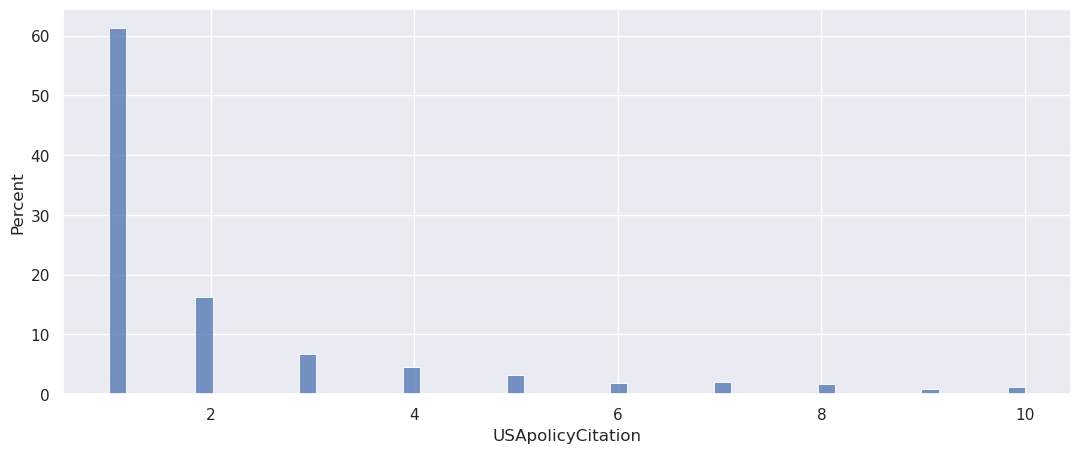

In [22]:
# sns.set_style(style="whitegrid")

#%matplotlib inline
sns.set_theme(style="darkgrid")
#sns.set_palette("red")

# sns.boxplot(scaled_merged_file['USApolicyCitation'], color='red')
# plt.gcf().set_size_inches(15, 5)
# sns.displot(scaled_merged_file['USApolicyCitation'], kind="kde", bw_adjust=.25, color='blue')
# plt.show
sns.histplot(scaled_merged_file, x= 'USApolicyCitation', discrete = False, stat ='percent')
plt.gcf().set_size_inches(13, 5)
plt.savefig('density plot class.png',bbox_inches = 'tight')
plt.show()

#count', 'density', 'percent', 'probability' or 'frequency';

In [501]:
# scaled_merged_file.info()

In [23]:
scaled_merged_file_class = scaled_merged_file.copy(deep = False)

In [24]:
scaled_merged_file_class.loc[scaled_merged_file_class['USApolicyCitation']>1, 'USApolicyCitation'] = 0

In [25]:
type(scaled_merged_file_class['USApolicyCitation'].value_counts())
scaled_merged_file_class['USApolicyCitation'].value_counts() #(normalize=True)*100

1    1002
0     631
Name: USApolicyCitation, dtype: int64

In [26]:
# Feature selection

In [27]:
predictors = set(scaled_merged_file_class.columns) -{'USApolicyCitation'}

In [28]:
# predictors

In [29]:
def get_correlated_features(df:pd.core.frame.DataFrame ,feature_list: list)->tuple:
    correlated_features = set()
    similar_colms = defaultdict(list)
    correlation_matrix = df[feature_list].corr(method='spearman')

    for i in range(len(correlation_matrix.columns)):
        for j in range(len(correlation_matrix.columns)): #range(i)
            corr_value = abs(correlation_matrix.iloc[i, j])
            if (corr_value >= 0.70 or corr_value<=-0.70) and corr_value!=1:
                colname = correlation_matrix.columns[i]
                similar_colms[colname].append({correlation_matrix.columns[j]:corr_value})
                if(j<i):
                    correlated_features.add(colname)
                # print(colname,"\n",correlation_matrix.columns[j])
    correlation_matrix_cols = set(correlation_matrix.columns)
    selected_features_spearmanr = list(correlation_matrix_cols-correlated_features)

    return (selected_features_spearmanr,similar_colms)

In [30]:
selected_lexical_counting_features, similar_colms_for_lexical_counting_features = get_correlated_features(scaled_merged_file,lexical_counting_features)
print("\nselected_lexical_counting_features :\n",selected_lexical_counting_features)
selected_lexical_diversity_features, similar_colms_for_lexical_diversity_features = get_correlated_features(scaled_merged_file,lexical_diversity_features)
print("\nselected_lexical_diversity_features :\n",selected_lexical_diversity_features)
selected_readability_features, similar_colms_for_readability_features = get_correlated_features(scaled_merged_file,readability_features)
print("\nlexical_readability_features :\n",selected_readability_features)
selected_mean_model_sim_score_columns, similar_colms_for_mean_model_sim_score_columns = get_correlated_features(scaled_merged_file,mean_model_sim_score_columns)
print("\nselected_mean_model_sim_score_columns :\n",selected_mean_model_sim_score_columns)


all_selected_features = selected_mean_model_sim_score_columns+selected_lexical_counting_features+selected_lexical_diversity_features+selected_readability_features


selected_all_selected_features, similar_colms_for_all_selected_features = get_correlated_features(scaled_merged_file,all_selected_features)
print("\nselected_all_selected_features :\n",selected_all_selected_features)
print(len(all_selected_features),len(selected_all_selected_features))

print("\n...................................")
for feature in selected_lexical_counting_features:
    print("\n",feature,":", similar_colms_for_lexical_counting_features[feature])
    
for feature in selected_lexical_diversity_features:
    print("\n",feature,":", similar_colms_for_lexical_diversity_features[feature])
    
for feature in selected_readability_features:
    print("\n",feature,":", similar_colms_for_readability_features[feature])

for feature in selected_mean_model_sim_score_columns:
    print("\n",feature,":", similar_colms_for_mean_model_sim_score_columns[feature])

for feature in selected_all_selected_features:
    print("\n",feature,":", similar_colms_for_all_selected_features[feature])



selected_lexical_counting_features :
 ['avg_adjective_count', 'pos_dissimilarity', 'avg_adverb_count', 'average_sentence_length', 'avg_adposition_count', 'avg_verb_count', 'char_count', 'frequency_index', 'avg_noun_count', 'avg_conjunction_count', 'avg_word_length']

selected_lexical_diversity_features :
 ['lex_ttr', 'lex_hdd', 'lex_rttr', 'lex_msttr']

lexical_readability_features :
 ['smog_index', 'gunning_fog', 'linsear_write_formula', 'mcalpine_eflaw', 'reading_time']

selected_mean_model_sim_score_columns :
 ['mean_sentence_t5_xl_sim', 'mean_specter_sim', 'mean_bert_large_uncased_sim', 'mean_tfidf_sim', 'mean_all_distilroberta_v1_sim']

selected_all_selected_features :
 ['smog_index', 'avg_adjective_count', 'pos_dissimilarity', 'lex_rttr', 'lex_msttr', 'avg_adverb_count', 'gunning_fog', 'avg_verb_count', 'linsear_write_formula', 'mean_specter_sim', 'mean_tfidf_sim', 'mean_all_distilroberta_v1_sim', 'average_sentence_length', 'mean_sentence_t5_xl_sim', 'avg_adposition_count', 'cha

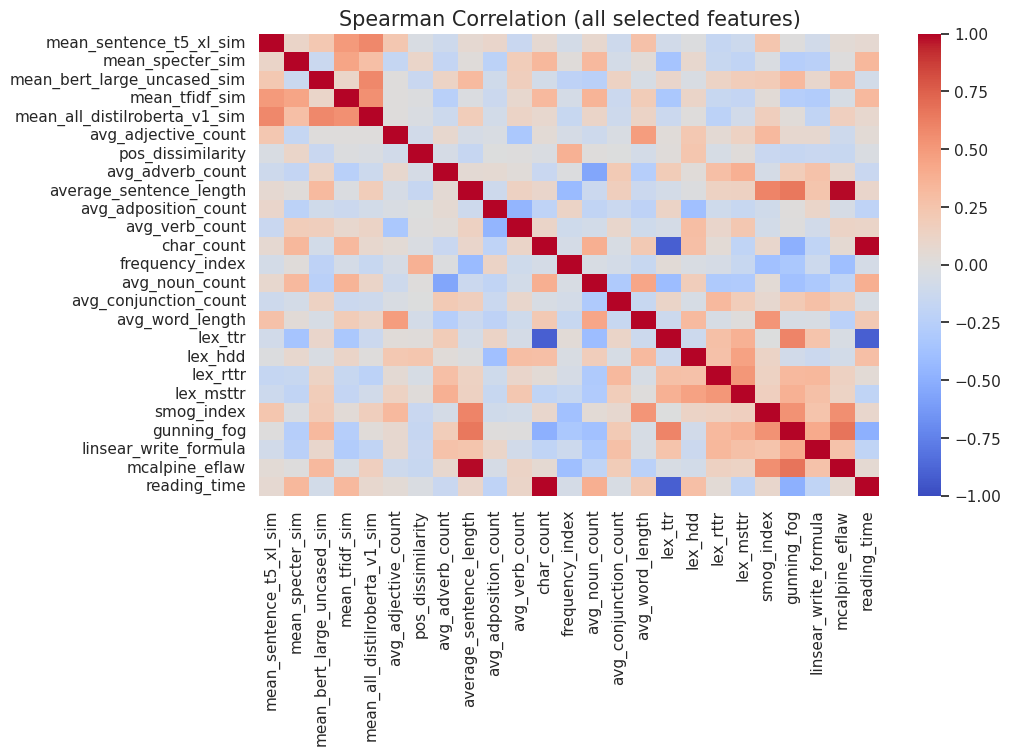

In [37]:
# columns
# Spearman's Correlation
def display_correlation(df):
    r = df.corr(method="spearman")
    # upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k =1).astype(np.bool))

    # print(type(r))
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(r, vmin=-1, 
                      vmax=1, cmap='coolwarm', annot=False)
    
    plt.title("Spearman Correlation (all selected features)", fontsize=15 )
    # plt.savefig('selected_all_features1.png',bbox_inches ='tight')   

    # heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 45)
    # plt.yticks(np.arange(7)+0.5, va = 'center')
    plt.show()
    
    return(r)


def display_corr_pairs(df,color="cyan"):
    r = display_correlation(df)
    
# readability_features
# lexical_diversity_features
# lexical_counting_features
# mean_model_sim_score_columns
    
display_corr_pairs(scaled_merged_file[all_selected_features])

In [203]:
scaled_merged_file_class.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1342 entries, https://doi.org/10.1001/archderm.138.12.1584 to https://doi.org/10.9778/cmajo.20190026
Data columns (total 64 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   char_count                       1342 non-null   float64
 1   letter_count                     1342 non-null   float64
 2   word_count                       1342 non-null   float64
 3   syllable_count                   1342 non-null   float64
 4   monosyllabcount                  1342 non-null   float64
 5   polysyllabcount                  1342 non-null   float64
 6   sentence_count                   1342 non-null   float64
 7   avg_word_length                  1342 non-null   float64
 8   average_sentence_length          1342 non-null   float64
 9   avg_syllables_per_word           1342 non-null   float64
 10  n_unique_words                   1342 non-null   float64
 11  n_long_wor

In [70]:
# modeling

In [194]:
# !pip3 install xgboost
!pip3 install imblearn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 4.6 MB/s eta 0:00:00a 0:00:01


In [204]:
# explore the algorithm wrapped by RFE
from numpy import mean
from numpy import std
from sklearn.metrics import f1_score
import sklearn
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.naive_bayes import GaussianNB

from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,f_regression
# from sklearn.pipeline import Pipeline
# from xgboost.xgbclassifier import XGBClassifier
from imblearn.over_sampling import SMOTE

In [230]:
# scaled_merged_file_class[selected_all_selected_features]

In [416]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',random_state=42),
        'params' : {
            'model__C': [0.1, 1, 5, 6, 8], #regular 1.0, 
            'model__kernel': ['rbf','linear'] ,#rbf
            'model__max_iter':[10000]
        }  
    },
      
      'KNN': {
          'model': KNeighborsClassifier(algorithm='auto'), #auto
          'params': {
                'model__n_neighbors': [20,30,50], #5
                'model__leaf_size': [20,30, 50], # 30 
                'model__p': [1,2], # 2 |p=1 manhattan_dist, p=2: eucledean_dist
                'model__weights': ['uniform', 'distance'], #uniform
                'model__metric': ['minkowski', 'chebyshev'] #minkowski
          }
      },
    
     'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {
            
         'model__var_smoothing': [0,1e-9,1e-7, 1e-5] 
        
        }
    },
    
    
    'decision_tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'model__criterion': ['gini','entropy'], #gini 
            'model__max_depth':[5,10,15], #None
            'model__min_samples_leaf':[30,50,70], #1
            'model__min_samples_split': [30,50,70] #2
            
            
        }
    },    
          

    'random_forest': {
        'model': RandomForestClassifier(random_state=42), 
        'params' : {
            'model__n_estimators': [50,100, 150,200], # 100
            'model__max_depth':[5,10,15], # None
            'model__min_samples_leaf':[30,50,70], # 
            'model__min_samples_split': [30,50,70], #2
            'model__max_features': [0.4, 0.6] # 'sqrt'# (n_features)
            
        }
    },
    
      'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'model__max_depth':[5,10,15], #3
            'model__n_estimators': [50,100, 150, 200], #100
            'model__learning_rate': [0.001, 0.01, 0.1], #0.1
            'model__min_samples_leaf':[30,50,70], # 1
            'model__min_samples_split': [30,50,70],  # 2
            'model__max_features': [0.4, 0.5] # None
        }
    },
    
    
      'xgboost': {
      
       'model': XGBClassifier(random_state=42),
 
       'params': {
            'model__max_depth': [5,10,15],
            'model__n_estimators' :[50,100,150, 200],
            'model__gamma' :[1,2,5],
            'model__eta': [0.1,0.5],
            'model__reg_alpha' : [0.1,0.5],
            'model__reg_lambda':[0.1,0.5],
           'model__learning_rate':[ 0.001, 0.01, 0.1]
            # 'min_samples_leaf':[10,20],
            # 'min_samples_split': [10,20,30]
       
       }
      
      } ,
      
      'adaboost': {
      
       'model': AdaBoostClassifier(random_state=42),
 
       'params': {
           
        
            'model__n_estimators' :[50,100, 150, 200], #50
            'model__learning_rate':[ 0.001, 0.01, 0.1], # 1
            'model__algorithm':['SAMME', "SAMME.R"] # SAMME.R
       
       }
      
      } ,
      
       'bagging': {
           # 'model': BaggingClassifier(DecisionTreeClassifier(criterion= 'gini', max_depth= 5, min_samples_leaf= 50, min_samples_split =30)),
           'model': BaggingClassifier(DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, min_samples_leaf= 70, min_samples_split =30,random_state=42)),

           'params': {
               'model__n_estimators': [50,100, 150, 200],   # 10                                          
               'model__max_features': [0.4,0.6], # 1.0
            
           }
       },
      
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto', random_state=42), # liblinear good for small dataset
        'params': {
            'model__penalty':['l1','l2'],
            'model__C': [1.0,5.0,10.0],  # 1.0 Inverse of regularization strength; must be a positive float. 
                                         #Like in support vector machines, 
                                         #smaller values specify stronger regularization.
            'model__max_iter':[200] #100
        }
    },
      
    'sgd_classifier': { 
        'model': SGDClassifier(early_stopping = False, random_state=42), # hinge: linear svm, log_loss: logistic reg 
        'params':{
            "model__loss" : ["hinge", "log",  "perceptron"], # hinge |"squared_hinge", "modified_huber",
            "model__alpha" : [0.01, 0.1, 1], #0.0001, the higher, the stronger regularization 
            "model__penalty" : ["l2", "l1", "elasticnet", "none"], #l2
            'model__max_iter':[10000],
            'model__validation_fraction': [0.1] # 0.1
    
        }
    }
}


In [417]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, make_scorer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris

X = scaled_merged_file_class[selected_all_selected_features]
y = scaled_merged_file_class['USApolicyCitation']

# Number of folds for cross-validation
k = 5

# Create Stratified K-Fold Cross-Validation Split
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
skf1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


# Initialize a dictionary to store results for each model
results = {}
custom_scorer = make_scorer(f1_score)

for model_name, model_info in model_params.items():
    model = model_info['model']
    param_grid = model_info['params']

    # Initialize a list to store accuracy scores for each fold
    custom_scores = []

    # Iterate through the cross-validation folds
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Apply SMOTE to the training data within the loop
        smote = SMOTE(sampling_strategy='auto', random_state=42)
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

        # Create a pipeline for the model and grid search
        pipeline = Pipeline([
            ('model', model)
        ])

        grid_search = GridSearchCV(pipeline, param_grid, cv=skf1, n_jobs=-1, scoring=custom_scorer)
        grid_search.fit(X_train_resampled, y_train_resampled)

        # Get the best model from grid search
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
        # best_score = clf.best_score_

        # Make predictions on the test data
        y_pred = best_model.predict(X_test)

        # Calculate and store the accuracy score for this fold
        custom_score = f1_score(y_test, y_pred) # average='micro')
        custom_scores.append(custom_score)

    # Calculate and store the cross-validation results for this model
    mean_custom_score = sum(custom_scores) / k
    best_custom_score = max(custom_scores)
    std_custom_score = (sum((x - mean_custom_score) ** 2 for x in custom_scores) / (k - 1)) ** 0.5

    results[model_name] = {
        'mean_f1_score': mean_custom_score,
        'std_f1_score': std_custom_score,
        'best_estimators': best_model,
        'best_params': best_params
        # 'best_score': best_score
        
    }

# Print the cross-validation results for each model
for model_name, result in results.items():
    print(f"{model_name}:")
    print(f"Mean f1-score: {result['mean_f1_score']:.2f}")
    print(f"Standard Deviation of f1-score: {result['std_f1_score']:.2f}")
    # print("best estimators : ", result['best_estimators'])
    print("best_params : ", result['best_params'])
    # print("best_score : ", result['best_score'])


# bagging:
# Mean f1-score: 0.77
# Standard Deviation of f1-score: 0.04
# best_params :  {'model__max_features': 0.6, 'model__n_estimators': 200}

svm:
Mean f1-score: 0.69
Standard Deviation of f1-score: 0.03
best_params :  {'model__C': 6, 'model__kernel': 'linear', 'model__max_iter': 10000}
KNN:
Mean f1-score: 0.62
Standard Deviation of f1-score: 0.02
best_params :  {'model__leaf_size': 20, 'model__metric': 'minkowski', 'model__n_neighbors': 20, 'model__p': 2, 'model__weights': 'distance'}
naive_bayes_gaussian:
Mean f1-score: 0.71
Standard Deviation of f1-score: 0.03
best_params :  {'model__var_smoothing': 0}
decision_tree:
Mean f1-score: 0.76
Standard Deviation of f1-score: 0.02
best_params :  {'model__criterion': 'entropy', 'model__max_depth': 10, 'model__min_samples_leaf': 70, 'model__min_samples_split': 30}
random_forest:
Mean f1-score: 0.77
Standard Deviation of f1-score: 0.03
best_params :  {'model__max_depth': 10, 'model__max_features': 0.4, 'model__min_samples_leaf': 30, 'model__min_samples_split': 70, 'model__n_estimators': 50}
Gradient Boosting:
Mean f1-score: 0.77
Standard Deviation of f1-score: 0.01
best_params :  {'

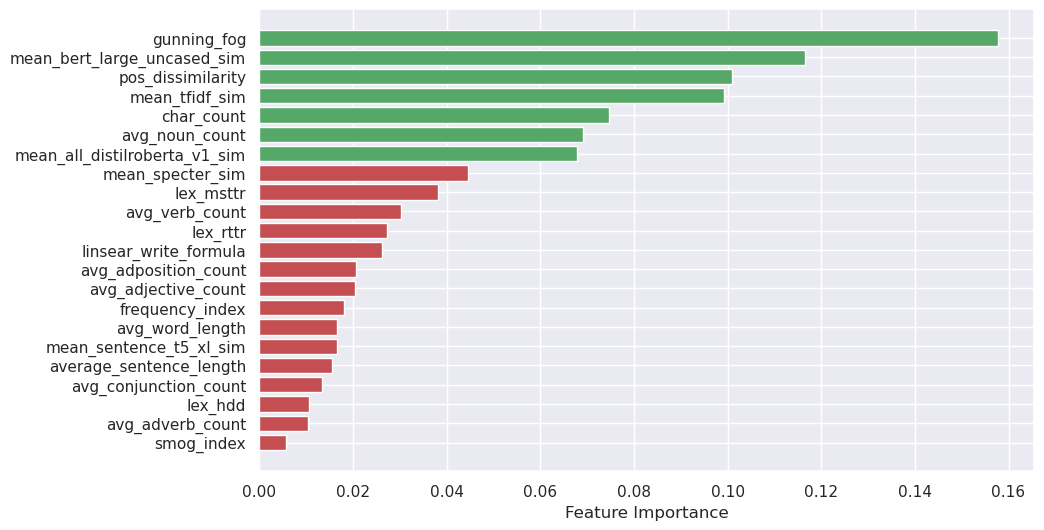

Selected Features: ['gunning_fog', 'mean_bert_large_uncased_sim', 'pos_dissimilarity', 'mean_tfidf_sim', 'char_count', 'avg_noun_count', 'mean_all_distilroberta_v1_sim', 'mean_specter_sim', 'lex_msttr', 'avg_verb_count', 'lex_rttr', 'linsear_write_formula', 'avg_adposition_count', 'avg_adjective_count', 'frequency_index', 'avg_word_length', 'mean_sentence_t5_xl_sim', 'average_sentence_length', 'avg_conjunction_count', 'lex_hdd', 'avg_adverb_count', 'smog_index']


In [420]:
model.fit(X_train, y_train) 
# Step 2: Access Feature Importances
feature_importances = model.feature_importances_

# Step 3: Sort Feature Importances
sorted_feature_importances = sorted(zip(feature_importances, X.columns), reverse=True)

# Step 4: Visualize Feature Importances
# top_features = 10  # Choose the number of top features to display
importance, feature_names = zip(*sorted_feature_importances)
colors = ['r' if imp<0.05 else 'g' for imp in importance]

plt.figure(figsize=(10, 6))
plt.barh(sorted(range(len(feature_importances)),reverse = True), importance, align='center', color = colors)
plt.yticks(sorted(range(len(feature_importances)),reverse = True), feature_names)
plt.xlabel('Feature Importance')
plt.savefig('random_feature_imp.png',bbox_inches = 'tight')
# plt.title('Feature Importances for classification')
plt.show()

# To select a specific number of top features:
k = 10  # Replace with the desired number of top features
selected_features = [feature for importance, feature in sorted_feature_importances]

print("Selected Features:", selected_features)


In [ ]:
!pip3 install shap

Permutation explainer: 270it [00:41,  4.90it/s]                         


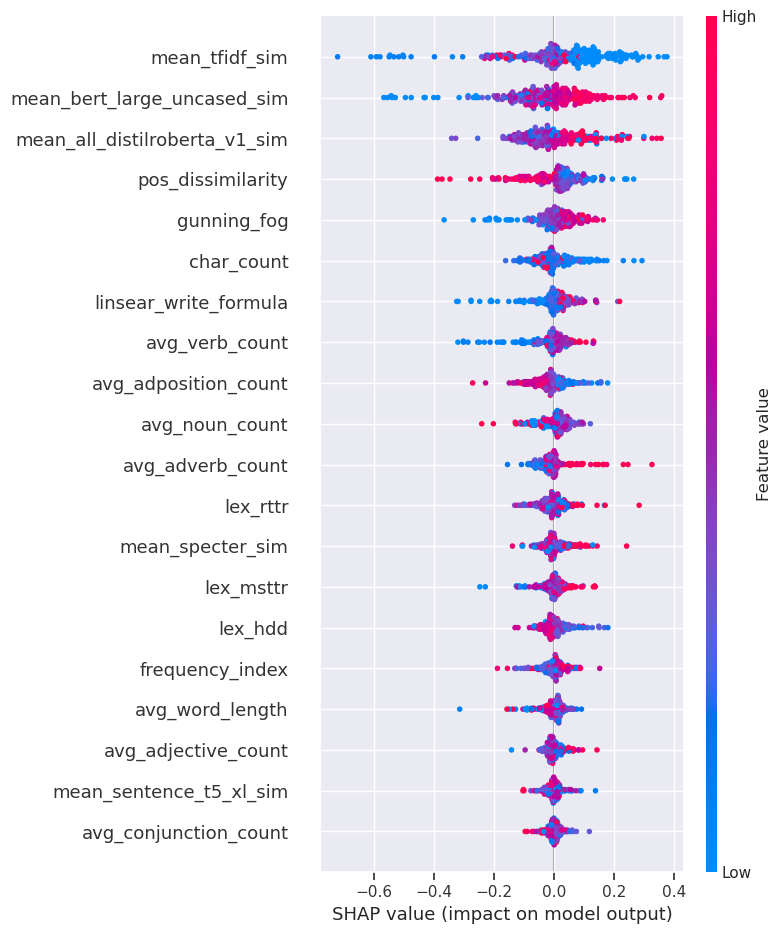

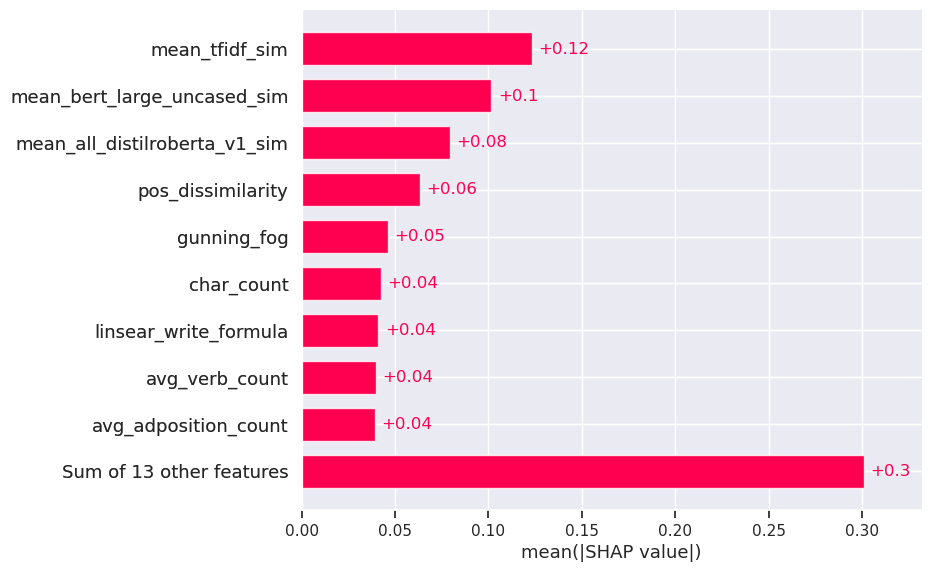

In [432]:
import shap
import numpy as np
from shap import TreeExplainer, summary_plot
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Step 1: Train a Binary Classifier
# model = BaggingClassifier(DecisionTreeClassifier(criterion='entropy', max_depth= 10, min_samples_leaf= 70, min_samples_split= 30),max_features= 0.4, n_estimators= 100)
# model = XGBClassifier(eta = 0.1, gamma = 1, learning_rate = 0.1, max_depth = 5, n_estimators = 150, reg_alpha = 0.5,reg_lambda= 0.5,random_state = 42)
# model = RandomForestClassifier(max_depth= 10, max_features = 0.4, min_samples_leaf = 30, min_samples_split =70,n_estimators = 50, random_state=42)
model = GradientBoostingClassifier(learning_rate = 0.1, max_depth= 10, max_features = 0.5, min_samples_leaf = 30, min_samples_split =30,n_estimators = 200, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X,y, stratify =y, test_size =0.2, random_state =42)
model.fit(X_train, y_train)  # Replace X and y with your feature and target variables

# Step 2: Explain Model Predictions with SHAP

explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)

# Step 3: Visualize SHAP Values
# Summary Plot
summary = shap.summary_plot(shap_values, show = False)
plt.savefig('summary_plot_gb.png',bbox_inches = 'tight')
plt.show()

shap.plots.bar(shap_values, show = False)
plt.savefig('summary_plot_gb_bar.png',bbox_inches = 'tight')
plt.show()



[[0.70922647 0.62814539 0.66387337 0.66666667 0.67411546]
 [0.70922647 0.66076421 0.67504655 0.67970205 0.68063315]
 [0.7278658  0.68033551 0.69366853 0.70763501 0.68715084]
 [0.77353215 0.72693383 0.73743017 0.75605214 0.74022346]
 [0.79217148 0.74650513 0.77001862 0.77188082 0.76908752]
 [0.80428705 0.78378378 0.79702048 0.81098696 0.78957169]
 [0.82851817 0.82292637 0.82495345 0.85009311 0.81471136]
 [0.85740913 0.8471575  0.85195531 0.87523277 0.83985102]
 [0.87604846 0.87138863 0.86312849 0.90223464 0.86592179]
 [0.89748369 0.91332712 0.89385475 0.92458101 0.88826816]
 [0.93289842 0.94128611 0.92364991 0.94040968 0.92458101]
 [0.94967381 0.96551724 0.93947858 0.96834264 0.95251397]
 [0.96924511 0.98415657 0.94785847 0.98510242 0.98137803]
 [0.97670084 0.99254427 0.97113594 0.98975791 0.99068901]
 [0.98788444 0.99534017 0.98324022 0.99627561 0.99627561]
 [0.9888164  0.9972041  0.98603352 0.9981378  0.9981378 ]
 [0.99254427 0.99813607 0.9972067  0.9990689  1.        ]
 [0.99534017 0

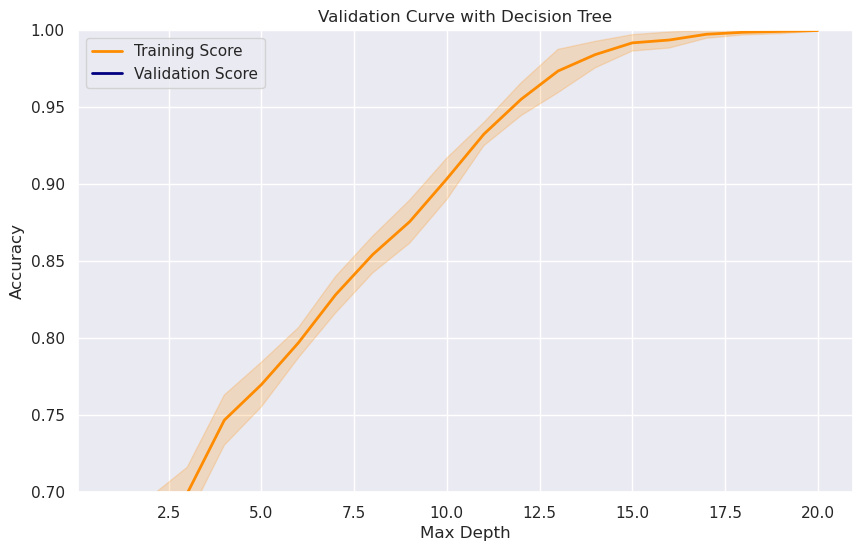

In [261]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import validation_curve

# Load the dataset
X = scaled_merged_file_class[selected_all_selected_features]
y = scaled_merged_file_class['USApolicyCitation']


# Define a range of maximum tree depths to explore
max_depths = np.arange(1, 21)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Use validation_curve to compute training and validation scores for different depths
train_scores, val_scores = validation_curve(
    clf, X, y, param_name="max_depth", param_range=max_depths,
    cv=5, scoring="accuracy", n_jobs=-1
)
print(train_scores)

# Calculate the mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot the validation curve
plt.figure(figsize=(10, 6))
plt.title("Validation Curve with Decision Tree")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
lw = 2
plt.plot(max_depths, train_mean, label="Training Score", color="darkorange", lw=lw)
plt.fill_between(max_depths, train_mean - train_std, train_mean + train_std, alpha=0.2, color="darkorange")
plt.plot(max_depths, val_mean, label="Validation Score", color="navy", lw=lw)
plt.fill_between(max_depths, val_mean - val_std, val_mean + val_std, alpha=0.2, color="navy")
plt.legend(loc="best")
plt.show()


In [211]:
estimator = RandomForestClassifier()

In [212]:
estimator.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

# smote before 

In [132]:
X = scaled_merged_file_class[selected_all_selected_features]
y = scaled_merged_file_class['USApolicyCitation']
smote = SMOTE(sampling_strategy ='auto', random_state = 42)

X_resampled, y_resampled = smote.fit_resample(X,y)
print(X.shape)
print(X_resampled.shape)
print(y.shape)
print(y_resampled.shape)
print(type(X),type(X_resampled), type(y), type(y_resampled))

(1342, 21)
(1686, 21)
(1342,)
(1686,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=y)
# X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined, test_size=0.50, random_state=1, stratify=y)

In [134]:
X_combined = pd.concat([X, X_resampled], axis = 0)
# X_combined =  np.concatenate((X,X_resampled[:,None]),axis=1)

y_combined = pd.concat([y, y_resampled], axis = 0)
# y_combined =  np.concatenate((y,y_resampled[:,None]),axis=1)

print(X_combined.shape, y_combined.shape)

(3028, 21) (3028,)


In [262]:
pipeline = Pipeline(
    [
     ('selector',SelectKBest(f_regression)),
     ('model',RandomForestClassifier(random_state = 0))
    ]
)
search = GridSearchCV(
    estimator = pipeline,
    param_grid = {
            'selector__k':[3,4,5,6,7,8,9,10] ,
            # 'model__n_estimators': [1,5,10,20,50],
            # 'model__max_depth':[2,3,5,8,10,15,20,25],
            # 'model__min_samples_leaf':[10,20,30],
            # 'model__min_samples_split': [10,20,30]
 },
    n_jobs=-1,
    scoring=['f1','recall'],
    cv=5,
    refit = 'f1'
)

search.fit(X_train,y_train)
search.best_params_
search.feature_importances_


AttributeError: 'GridSearchCV' object has no attribute 'feature_importances_'

In [136]:
print(search.cv_results_['mean_test_recall'])
print(search.cv_results_['mean_test_f1'])
print(search.best_score_)

[0.77290216 0.77737977 0.78624655 0.79668325 0.81002764 0.83667219
 0.82337203 0.82038695]
[0.71952866 0.72874505 0.73513695 0.74052491 0.74571391 0.76129931
 0.76010625 0.75616045]
0.7612993137042159


In [244]:
  model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20,30],
            'kernel': ['rbf','linear']
        }  
    },
      
      'KNN': {
          'model': KNeighborsClassifier(algorithm='auto'),
          'params': {
                'n_neighbors': [10,20,30,50],
                'leaf_size': [10,20,40],
                'p': [1,2],
                'weights': ['uniform', 'distance'],
                'metric': ['minkowski', 'chebyshev']
          }
      },
                   

    'random_forest': {
        'model': RandomForestClassifier(), 
        'params' : {
            'n_estimators': [1,5,10,20,50],
            'max_depth':[2,3,5,8],
            'min_samples_leaf':[10,20,30],
            'min_samples_split': [10,20,30]
        }
    },
      'xgboost': {
      
       'model': XGBClassifier(),
 
       'params': {
            # 'max_depth': [5],
            'n_estimators' :[10,30,50],
            'gamma' :[2],
            'eta': [0.8],
            'reg_alpha' : [0.5],
            'reg_lambda':[0.5],
           'learning_rate':[0.0001, 0.001, 0.01, 0.1]
            # 'min_samples_leaf':[10,20],
            # 'min_samples_split': [10,20,30]
       
       }
      
      } ,
      
      'adaboost': {
      
       'model': AdaBoostClassifier(),
 
       'params': {
        
            'n_estimators' :[10,30,50],
            'learning_rate':[0.0001, 0.001, 0.01, 0.1],
            'algorithm':['SAMME', "SAMME.R"]
       
       }
      
      } ,
      
       'bagging': {
           'model': BaggingClassifier(),
           'params': {
               'n_estimators': [10,30,50],                                             
               'max_features': [0.1,0.7, 0.01] 
           }
       },
      
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'penalty':['l1','l2'],
            'C': [1,5,10],
            'max_iter':[150]
        }
    },
      
    'sgd_classifier': { 
        'model': SGDClassifier(),
        'params':{
            "loss" : ["hinge", "log",  "perceptron"], # "squared_hinge", "modified_huber",
            "alpha" : [0.0001, 0.001, 0.01, 0.1],
            "penalty" : ["l2", "l1", "elasticnet", "none"],
            'max_iter':[10000]
    
        }
    },
      
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {
            
         'var_smoothing': [0,1e-9,1e-7, 1e-5] 
        
        }
    },
    # 'naive_bayes_multinomial': {
    #     'model': MultinomialNB(),
    #     'params': {}
    # },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            'max_depth':[2,3,5,8],
            'min_samples_leaf':[10,20],
            'min_samples_split': [10,20,30]
            
            
        }
    }     
}

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# import pandas as pd
scores = []

stratified_kfold = StratifiedKFold (n_splits = 2, shuffle = True, random_state = 42)
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=stratified_kfold, scoring=['recall','f1','roc_auc','balanced_accuracy'] ,return_train_score=True, refit='f1')
    gs_fit = clf.fit(X_combined,y_combined)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_,
        'n_features_in':clf.n_features_in_,
        # 'coef': clf.best_estimator_.coef_
        # 'fit_features_in':clf.best_estimator_.feature_names_in_
        
        # 'best_features': clf.best_estimator_.feature_importances_
        
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params','n_features_in'])
df

,model,best_score,best_params,n_features_in
0,svm,0.722623,"{'C': 10, 'kernel': 'rbf'}",21
1,KNN,0.871146,"{'leaf_size': 10, 'metric': 'minkowski', 'n_ne...",21
2,random_forest,0.814996,"{'max_depth': 8, 'min_samples_leaf': 10, 'min_...",21
3,xgboost,0.843771,"{'eta': 0.8, 'gamma': 2, 'learning_rate': 0.1,...",21
4,adaboost,0.752204,"{'algorithm': 'SAMME.R', 'learning_rate': 0.1,...",21
5,bagging,0.883280,"{'max_features': 0.7, 'n_estimators': 30}",21
6,logistic_regression,0.709125,"{'C': 1, 'max_iter': 150, 'penalty': 'l2'}",21
7,sgd_classifier,0.718636,"{'alpha': 0.01, 'loss': 'hinge', 'max_iter': 1...",21
8,naive_bayes_gaussian,0.707508,{'var_smoothing': 0},21
9,decision_tree,0.765959,"{'criterion': 'entropy', 'max_depth': 8, 'min_...",21


In [139]:
# sorted(sklearn.metrics.SCORERS.keys())
estimator = GaussianNB()
estimator.get_params().keys()

dict_keys(['priors', 'var_smoothing'])

In [140]:
df.iloc[2,2]

{'max_depth': 8,
 'min_samples_leaf': 10,
 'min_samples_split': 10,
 'n_estimators': 50}

In [296]:
df.iloc[2,3]

array(['avg_adverb_count', 'pos_dissimilarity', 'syntactic_similarity',
       'lex_msttr', 'lex_hdd', 'gunning_fog', 'frequency_index',
       'lex_rttr', 'avg_word_length', 'mean_all_distilroberta_v1_sim',
       'avg_verb_count', 'char_count', 'avg_conjunction_count',
       'avg_adjective_count', 'words_before_root', 'mean_specter_sim',
       'average_sentence_length', 'linsear_write_formula',
       'avg_adposition_count', 'mean_tfidf_sim', 'avg_noun_count',
       'mean_bert_large_uncased_sim', 'smog_index',
       'mean_sentence_t5_xl_sim'], dtype=object)

In [299]:
df.iloc[0,3]

array(['avg_adverb_count', 'pos_dissimilarity', 'syntactic_similarity',
       'lex_msttr', 'lex_hdd', 'gunning_fog', 'frequency_index',
       'lex_rttr', 'avg_word_length', 'mean_all_distilroberta_v1_sim',
       'avg_verb_count', 'char_count', 'avg_conjunction_count',
       'avg_adjective_count', 'words_before_root', 'mean_specter_sim',
       'average_sentence_length', 'linsear_write_formula',
       'avg_adposition_count', 'mean_tfidf_sim', 'avg_noun_count',
       'mean_bert_large_uncased_sim', 'smog_index',
       'mean_sentence_t5_xl_sim'], dtype=object)

In [141]:
df.iloc[6,2]

{'C': 1, 'max_iter': 150, 'penalty': 'l2'}

In [ ]:

	model	best_score	best_params
0	svm	0.661282	{'C': 20, 'kernel': 'linear'}
1	random_forest	0.633881	{'n_estimators': 10}
2	xgboost	0.649337	{'eta': 0.8, 'gamma': 2, 'max_depth': 2, 'reg_...
3	logistic_regression	0.666883	{'C': 5, 'penalty': 'l1'}
4	naive_bayes_gaussian	0.649333	{}
5	decision_tree	0.586779	{'criterion': 'gini'}

model	best_score	best_params
0	svm	0.639495	{'C': 20, 'kernel': 'linear'}
1	random_forest	0.581177	{'n_estimators': 5}
2	logistic_regression	0.636688	{'C': 1}
3	naive_bayes_gaussian	0.612100	{}
4	decision_tree	0.571355	{'criterion': 'entropy'}

model	best_score	best_params
0	svm	0.628268	{'C': 10, 'kernel': 'rbf'}
1	random_forest	0.558038	{'n_estimators': 1}
2	logistic_regression	0.606516	{'C': 1}
3	naive_bayes_gaussian	0.626874	{}
4	decision_tree	0.535513	{'criterion': 'gini'}